In [15]:
# Step 1: Import necessary libraries
import numpy as np
from ripser import ripser
from persim import PersImage
import matplotlib.pyplot as plt
from persim import plot_diagrams

import gudhi as gd
from ripser import Rips
from persim import PersImage
from persim import PersistenceImager


In [3]:
def merge_sublists_with_shared_items(data):
    merged = True
    while merged:
        merged = False
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                if set(data[i]).intersection(data[j]):
                    data[i] = list(set(data[i]).union(data[j]))
                    del data[j]
                    merged = True
                    break
            if merged:
                break
    return data

def getGradients(modelpth : str = "", model : str = "lenet"):
    if not modelpth:
        return {}
    if model == "lenet":
        model1 = LeNet().to(device)
        dataset_test = datasets.MNIST('data/mnist/', train=False, download=True, transform=trans_mnist)
        test_loader = torch.utils.data.DataLoader(
                        dataset_test, batch_size=32,
                        num_workers=2, pin_memory=True, shuffle=False)
    elif model == "vgg":
        model1 = VGG16().to(device)
        dataset_test = datasets.CIFAR10('data/cifar10/', train=False, download=True, transform=trans_cifar10_val)
        test_loader = torch.utils.data.DataLoader(
                        dataset_test, batch_size=32,
                        num_workers=2, pin_memory=True, shuffle=False)

    elif model == "resnet":
        model1 = ResNet20().to(device)
        dataset_test = datasets.CIFAR10('data/cifar10/', train=False, download=True, transform=trans_cifar10_val)
        test_loader = torch.utils.data.DataLoader(
                        dataset_test, batch_size=32,
                        num_workers=2, pin_memory=True, shuffle=False)
                        
    model1.load_state_dict(torch.load(modelpth))
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model1.parameters(), lr=0.01, momentum=0.5)

    for X, Y in test_loader:
        X_test = X.to(device)
        Y_test = Y.to(device)
        # print(Y)
        break

    # Forward pass
    outputs = model1(X_test)

    # Compute the loss
    loss = criterion(outputs, Y_test)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Access the gradients
    gradients1 = {}
    for name, param in model1.named_parameters():
        gradients1[name] = param.grad
    return gradients1

def get_total_length(lst):
    total_length = 0

    for item in lst:
        if isinstance(item, list):
            total_length += get_total_length(item)
        else:
            total_length += 1

    return total_length

In [4]:

# Set the random seed for reproducibility
np.random.seed(42)

# Number of points in each cluster
num_points = 100

# Cluster centers
centers = np.array([[2, 2], [8, 2], [2, 8], [8, 8]])

# Standard deviation for each cluster
std_dev = 0.5

# Generate points for each cluster
points = []
for center in centers:
    x = np.random.normal(center[0], std_dev, num_points)
    y = np.random.normal(center[1], std_dev, num_points)
    cluster_points = np.column_stack((x, y))
    points.append(cluster_points)

# Concatenate points from all clusters
points = np.concatenate(points)

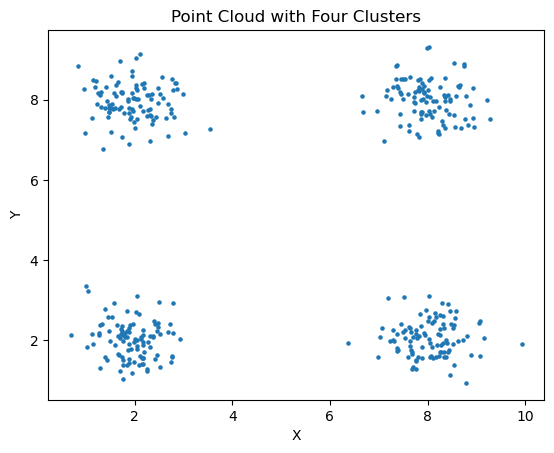

In [5]:
plt.scatter(points[:, 0], points[:, 1], s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Cloud with Four Clusters')
plt.show()

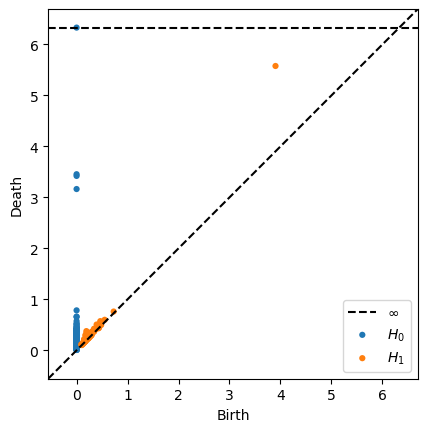

PersImage(pixels=[100, 100], spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")


/tmp/ipykernel_1546789/31668007.py:13: DeprecationWarning: Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.
  pim = PersImage(pixels=[100,100], spread=1)


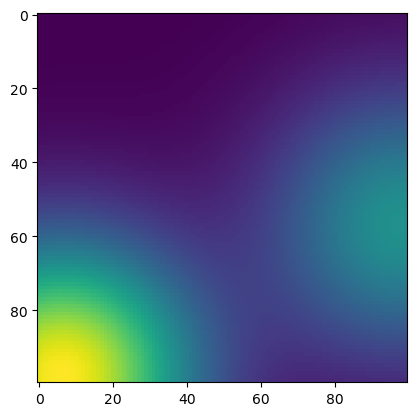

In [6]:

# Step 2: Create or load your point cloud data
# This is a random point cloud in 3 dimensions, you should replace this with your data
# point_cloud = np.random.random((100,3))
point_cloud = points

# Step 3: Compute persistence diagram using ripser
diagrams = ripser(point_cloud)['dgms']

# Step 4: Visualize the persistence diagram (optional)
plot_diagrams(diagrams, show=True)

# Step 5: Create a persistence image from the persistence diagram using persim
pim = PersImage(pixels=[100,100], spread=1)
img = pim.transform(diagrams[1])

# Step 6: Visualize the persistence image (optional)
plt.imshow(img)
plt.show()


In [12]:
num_points = 100

# Circle centers
centers = np.array([[2, 2], [8, 2], [2, 8], [8, 8]])

# Circle radii
radii = np.array([1, 1.5, 2, 0.5])

# Generate points for each circle
points = []
for center, radius in zip(centers, radii):
    theta = np.random.uniform(0, 2*np.pi, num_points)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    circle_points = np.column_stack((x, y))
    points.append(circle_points)

# Concatenate points from all circles
points = np.concatenate(points)

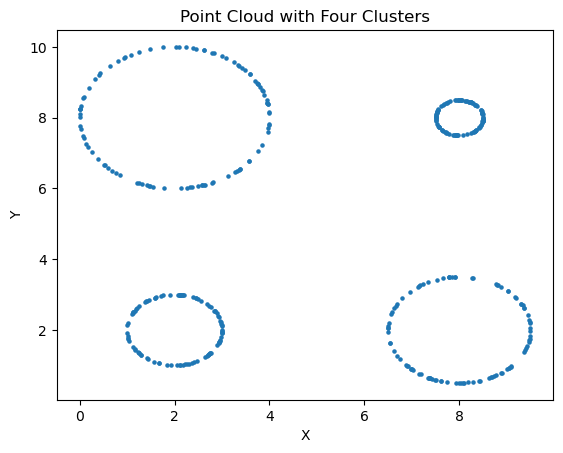

In [13]:
plt.scatter(points[:, 0], points[:, 1], s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Cloud with Four Clusters')
plt.show()

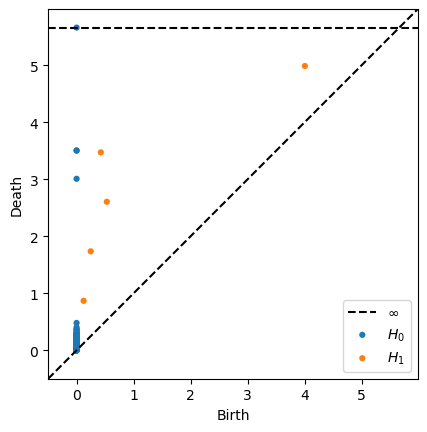

TypeError: Invalid shape (3,) for image data

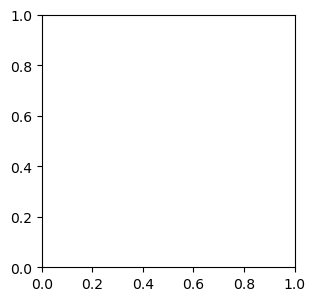

In [21]:

# Step 2: Create or load your point cloud data
# This is a random point cloud in 3 dimensions, you should replace this with your data
# point_cloud = np.random.random((100,3))
point_cloud = points

# Step 3: Compute persistence diagram using ripser
diagrams = ripser(point_cloud)['dgms']

# Step 4: Visualize the persistence diagram (optional)
plot_diagrams(diagrams, show=True)

# Step 5: Create a persistence image from the persistence diagram using persim
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(diagrams[1])
imgs = pimgr.transform(diagrams[1])
pimgr
# Step 6: Visualize the persistence image (optional)
# plt.imshow(imgs)
# plt.show()
imgs_array = np.array([img.flatten() for img in imgs])
plt.figure(figsize=(15,7.5))

for i in range(3):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

for i in range(3):
    ax = plt.subplot(240+i+5)
    pimgr.plot_image(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for circle w/ noise")


In [7]:
rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=100)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

count = 0
results = []
for (birth_value, death_value), d in [(i[1], i[0]) for i in persistence if i[0] == 0]:
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []
    filtration = simplex_tree.get_filtration()

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf and d != 0):
            death_simplices.append(simplex)
    # print(birth_simplices)

    # involved_points = set()

    # for birth_simplex in birth_simplices:
    #     for death_simplex in death_simplices:
    #         if set(birth_simplex).issubset(death_simplex):
    #             involved_points.update(birth_simplex)
    #             involved_points.update(death_simplex)
    
    # involved_points_b = (merge_sublists_with_shared_items(birth_simplices))
    involved_points_d = (merge_sublists_with_shared_items(death_simplices))

    # if len(involved_points_b) >= 0 : 
    #     print('b',count, birth_value, death_value, involved_points_b) 
    if len(involved_points_d) >= 0 : 
        print('d', d, count, birth_value, death_value, involved_points_d) 
        results.append([death_value, involved_points_d])
    count += 1

a = []
for [death_value, concern_points] in results:
    for c in concern_points:
        # print(c)
        a.append(c)
        
for i in range(0, len(a)):
    # if (np.unique(a[i:len(a)]).shape[0] == client_max*2):
    #     continue
    print("distance =", results[i][0], merge_sublists_with_shared_items(a[i:len(a)]))
    # print("score x{}: ".format(get_total_length(merge_sublists_with_shared_items(a[i:len(a)]))/client_max/2),end='')
    # for j in merge_sublists_with_shared_items(a[i:len(a)]):
    #     print([np.mean(np.array(j) >= client_max)], end=' ')
    print()


group = np.zeros((client_max*2,client_max*2))
for i in merge_sublists_with_shared_items(a)[0]:
    group[i][i] = 1
# df=pd.DataFrame(group)
# plot=seaborn.heatmap(df)
# plt.show()

d 0 0 0.0 inf []
d 0 1 0.0 3.4543652423824605 [[31, 162]]
d 0 2 0.0 3.421184954012316 [[79, 244]]
d 0 3 0.0 3.163859531031465 [[278, 368]]
d 0 4 0.0 0.783451043186773 [[109, 120]]
d 0 5 0.0 0.6591491358916122 [[355, 369]]
d 0 6 0.0 0.657484724110598 [[162, 185]]
d 0 7 0.0 0.5730618217481881 [[13, 35]]
d 0 8 0.0 0.5259741730707038 [[174, 178]]
d 0 9 0.0 0.5179301287002559 [[220, 278]]
d 0 10 0.0 0.4948379448238045 [[308, 381]]
d 0 11 0.0 0.46983798012145433 [[25, 67]]
d 0 12 0.0 0.45491752129187335 [[226, 244]]
d 0 13 0.0 0.4492611325172407 [[238, 271]]
d 0 14 0.0 0.4284726392931488 [[49, 74]]
d 0 15 0.0 0.4212271699370733 [[136, 183]]
d 0 16 0.0 0.41677173129927364 [[233, 266]]
d 0 17 0.0 0.41188786167067293 [[369, 385]]
d 0 18 0.0 0.40975061751242703 [[343, 371]]
d 0 19 0.0 0.407514137543937 [[346, 368]]
d 0 20 0.0 0.40530066707949347 [[148, 170]]
d 0 21 0.0 0.4037428622116046 [[229, 231]]
d 0 22 0.0 0.39996655359987493 [[182, 196]]
d 0 23 0.0 0.3948478360215139 [[225, 266]]
d 0 24 0.

IndexError: list index out of range